# Analysis of New York City Airbnb Prices (2011-2019)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Loading the data:

The prices in the dataset are nightly.

In [2]:
df = pd.read_csv("nyc_airbnb.csv")
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Profiling:

Check number of rows and columns, data types, and count of missing data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      48895 non-null  int64  
 1   id                              48895 non-null  int64  
 2   name                            48879 non-null  object 
 3   host_id                         48895 non-null  int64  
 4   host_name                       48874 non-null  object 
 5   neighbourhood_group             48895 non-null  object 
 6   neighbourhood                   48895 non-null  object 
 7   latitude                        48895 non-null  float64
 8   longitude                       48895 non-null  float64
 9   room_type                       48895 non-null  object 
 10  price                           48895 non-null  int64  
 11  minimum_nights                  48895 non-null  int64  
 12  number_of_reviews               

Convert the `last_review` column to datetime type.

In [4]:
df['last_review'] = pd.to_datetime(df['last_review'])

See if there are any duplicates.

In [5]:
print('Number of duplicated rows:', df.duplicated().sum())

Number of duplicated rows: 0


Count the distinct values in each column.

In [6]:
df.nunique().to_frame(name='Count of Unique Values')

,Count of Unique Values
Unnamed: 0,48895
id,48895
name,47905
host_id,37457
host_name,11452
neighbourhood_group,5
neighbourhood,221
latitude,19048
longitude,14718
room_type,3


Count the missing values in each column.

In [7]:
df.isna().sum().to_frame(name='Count of Missing Values')

,Count of Missing Values
Unnamed: 0,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0


Find the unique neighbourhood groups and room types in the dataset.

In [8]:
print('Unique neighbourhood groups:', df['neighbourhood_group'].unique())
print('Unique room types:', df['room_type'].unique())

Unique neighbourhood groups: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique room types: ['Private room' 'Entire home/apt' 'Shared room']


Find the earliest and latest dates in the `last_review` column.

In [9]:
print('Date of earliest review:', df['last_review'].min())
print('Date of latest review:', df['last_review'].max())

Date of earliest review: 2011-03-28 00:00:00
Date of latest review: 2019-07-08 00:00:00


## Data Cleaning:

Drop irrelavant columns.

In [10]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'reviews_per_month'], axis=1)

Check the number of zero price listings and drop those.

In [11]:
print('Number of listings with price = 0 is', (df['price'] == 0).sum())
df = df[df['price'] != 0]

Number of listings with price = 0 is 11


Find the number of listings that were last reviewed before July 2016 and remove them. We will only focus on recently reviewed listings to improve data quality.

In [12]:
print('Number of listings with a last review date before July 2016 is', (df['last_review'] < '2016-07-01').sum())
df = df[(df['last_review'] >= '2016-07-01') | df['last_review'].isna()]

Number of listings with a last review date before July 2016 is 2836


Display the descriptive statistics before the removal of outliers.

In [13]:
df.describe()

,Unnamed: 0,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
count,46048.000000,46048.000000,46048.000000,46048.000000,46048.000000,46048.000000,35997,46048.000000,46048.000000
mean,25427.313542,40.728872,-73.951531,152.479739,7.063173,24.427836,2018-12-29 09:55:26.977248,7.475374,117.730347
min,0.000000,40.499790,-74.244420,10.000000,1.000000,0.000000,2016-07-01 00:00:00,1.000000,0.000000
25%,14035.750000,40.689870,-73.982980,69.000000,1.000000,1.000000,2018-10-20 00:00:00,1.000000,0.000000
50%,25867.500000,40.722980,-73.955280,105.000000,3.000000,6.000000,2019-05-27 00:00:00,1.000000,57.000000
75%,37382.250000,40.763180,-73.935090,177.000000,5.000000,26.000000,2019-06-24 00:00:00,2.000000,238.000000
max,48894.000000,40.913060,-73.712990,10000.000000,1000.000000,629.000000,2019-07-08 00:00:00,327.000000,365.000000
std,13921.904656,0.054899,0.046925,227.634218,19.654236,45.604249,NaN,33.894296,132.047519


Find the distribution of prices before the removal of outliers.

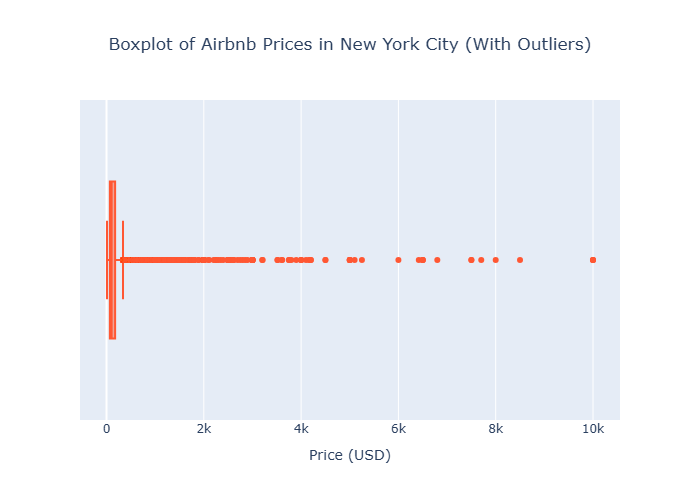

In [16]:
fig = px.box(
    df,
    x='price',
    title='Boxplot of Airbnb Prices in New York City (With Outliers)',
    color_discrete_sequence=['#FF5733']
)

fig.update_layout(
    title_x=0.5,
    xaxis_title='Price (USD)'
)

fig.show()
fig.show(renderer="png")

Some of the extreme values may have been entered incorrectly or represent weekly/monthly prices instead of nightly.

The data is not normally distributed, so remove the outliers using the IQR method.

In [18]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df['price'] < lower_bound) | (df['price'] > upper_bound)
]

df_filtered = df[
    (df['price'] >= lower_bound) & (df['price'] <= upper_bound)
]

Check the number of outliers.

In [19]:
print('Number of outliers:', outliers.shape[0])
print(f"The outliers represent {(outliers.shape[0]/df.shape[0]):.1%} of the entire dataset.")

Number of outliers: 2817
The outliers represent 6.1% of the entire dataset.


Remove listings that require at least 2 months minimum stay. We will only focus on short-term rental.

In [20]:
print('Number of listings with more than 2 months minimum stay requirement:', len(df_filtered[df_filtered['minimum_nights'] > 60]))
df_filtered = df_filtered[df_filtered['minimum_nights'] <= 60]

Number of listings with more than 2 months minimum stay requirement: 277


Display the descriptive statistics for the filtered dataframe.

In [21]:
df_filtered.describe()

,Unnamed: 0,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
count,42954.000000,42954.000000,42954.000000,42954.000000,42954.000000,42954.000000,34078,42954.000000,42954.000000
mean,25294.788076,40.728325,-73.949967,120.160544,5.951297,25.256716,2018-12-29 03:31:32.012442112,6.946338,113.944592
min,0.000000,40.499790,-74.244420,10.000000,1.000000,0.000000,2016-07-01 00:00:00,1.000000,0.000000
25%,14002.500000,40.688980,-73.981680,65.000000,1.000000,1.000000,2018-10-17 00:00:00,1.000000,0.000000
50%,25682.500000,40.721630,-73.953955,100.000000,2.000000,6.000000,2019-05-28 00:00:00,1.000000,51.000000
75%,37052.750000,40.763470,-73.932870,160.000000,5.000000,27.000000,2019-06-24 00:00:00,2.000000,227.000000
max,48894.000000,40.913060,-73.712990,339.000000,60.000000,629.000000,2019-07-08 00:00:00,327.000000,365.000000
std,13832.400886,0.055716,0.047310,68.606736,8.959634,46.446668,NaN,31.911694,130.686637


## Data Visualization:

### 1. Price distribution after removal of outliers

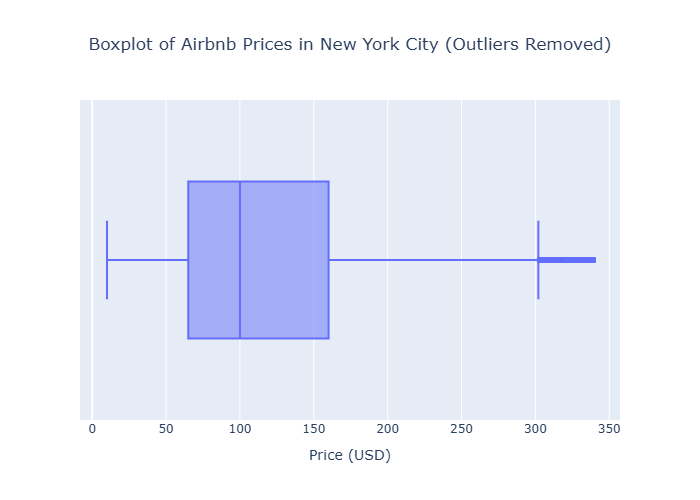

In [22]:
fig = px.box(
    df_filtered,
    x='price',
    title='Boxplot of Airbnb Prices in New York City (Outliers Removed)'
)

fig.update_layout(
    title_x=0.5,
    xaxis_title='Price (USD)'
)

fig.show()
fig.show(renderer="png")

### 2. Number of listings per borough

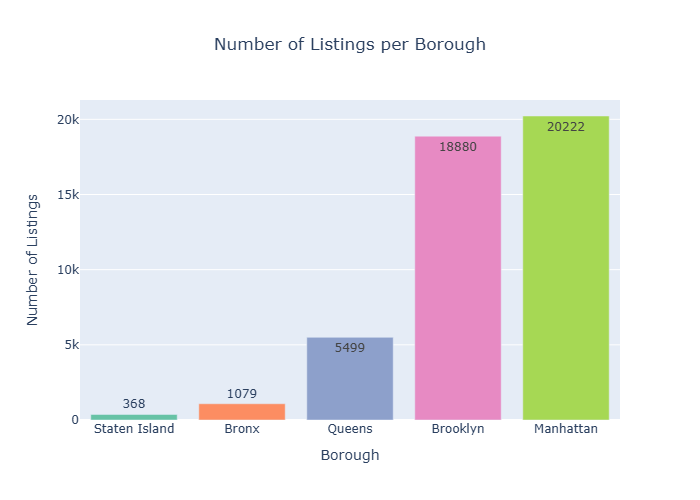

In [23]:
listings_count = df['neighbourhood_group'].value_counts().reset_index().sort_values(by='count', ascending=True)

fig = px.bar(
    listings_count,
    x='neighbourhood_group',
    y='count',
    color='neighbourhood_group',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Number of Listings per Borough',
    labels={'neighbourhood_group': 'Borough', 'count': 'Number of Listings'},
    text_auto='.0f'
)

fig.update_layout(title_x=0.5, showlegend=False)
fig.show()
fig.show(renderer="png")

### 3. Average nightly price by borough

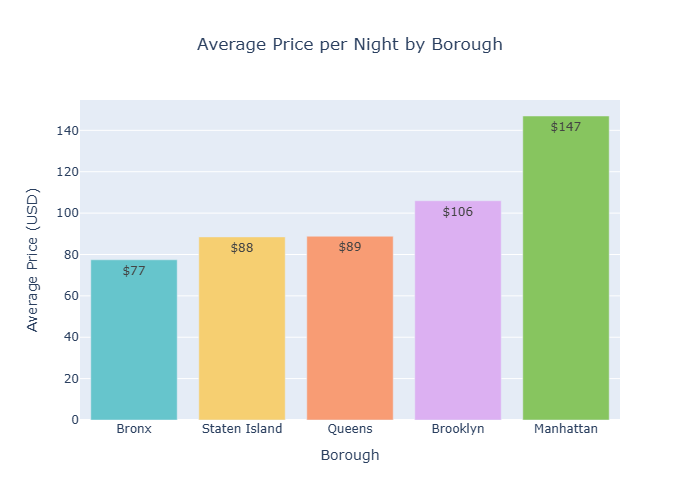

In [24]:
avg_price = df_filtered.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values(by='price', ascending=True)

fig = px.bar(
    avg_price,
    x='neighbourhood_group',
    y='price',
    color='neighbourhood_group',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Average Price per Night by Borough',
    labels={'neighbourhood_group': 'Borough', 'price': 'Average Price (USD)'},
    text_auto='$.0f'
)

fig.update_layout(title_x=0.5, showlegend=False)
fig.show()
fig.show(renderer="png")

### 4. Top 5 most expensive neighbourhoods

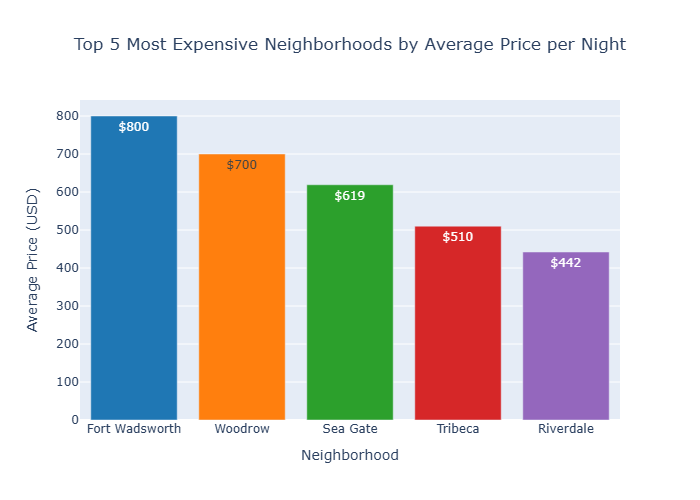

In [25]:
avg_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean().reset_index().sort_values(by='price', ascending=False).head(5)

fig = px.bar(
    avg_price_by_neighborhood,
    x='neighbourhood',
    y='price',
    title='Top 5 Most Expensive Neighborhoods by Average Price per Night',
    labels={'neighbourhood': 'Neighborhood', 'price': 'Average Price (USD)'},
    color='neighbourhood',
    color_discrete_sequence=px.colors.qualitative.D3,
    text_auto='$.0f'
)

fig.update_layout(title_x=0.5, showlegend=False, uniformtext_minsize=8)
fig.show()
fig.show(renderer="png")

### 5. Percentage of different property listings

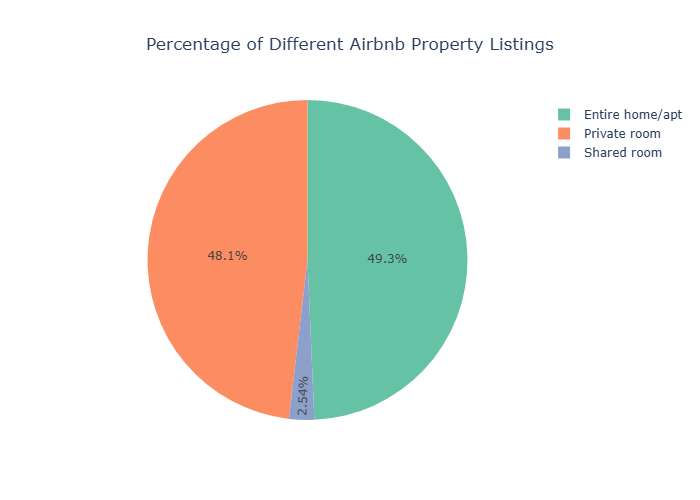

In [26]:
room_counts = df_filtered['room_type'].value_counts().reset_index()

fig = px.pie(
    room_counts,
    names='room_type',
    values='count',
    title='Percentage of Different Airbnb Property Listings',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(title_x=0.5, width=600, height=600)
fig.show()
fig.show(renderer="png")

### 6. Average nightly price by property type

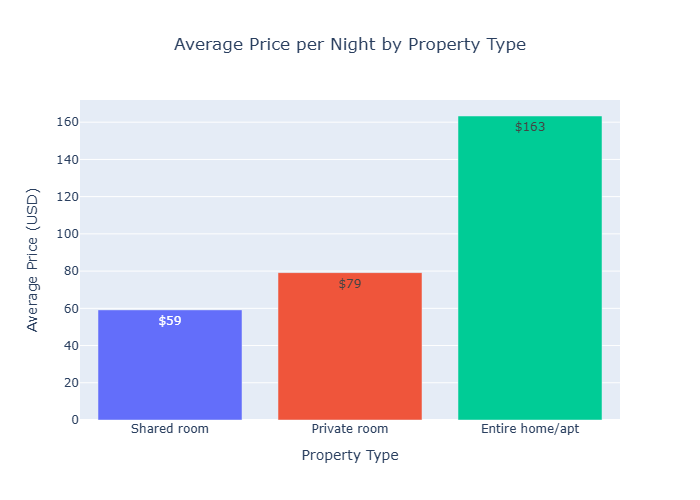

In [27]:
avg_price = df_filtered.groupby('room_type')['price'].mean().reset_index().sort_values(by='price', ascending=True)

fig = px.bar(
    avg_price,
    x='room_type',
    y='price',
    color='room_type',
    title='Average Price per Night by Property Type',
    labels={'room_type': 'Property Type', 'price': 'Average Price (USD)'},
    text_auto='$.0f'
)

fig.update_layout(title_x=0.5, showlegend=False)
fig.show()
fig.show(renderer="png")

### 7. Average nightly price by number of reviews

First, group the number of reviews into categories and find the count of each.

It appears that the vast majority of listings have less than 50 reviews and very few have more than 200 reviews.

In [28]:
df_filtered_copy = df_filtered.copy()

df_filtered_copy['reviews_bin'] = pd.cut(
    df_filtered['number_of_reviews'],
    bins=[0, 50, 100, 200, 400, float('inf')],
    labels=['<50', '51-100', '101-200', '201-400', '400+']
)

df_filtered_copy['reviews_bin'].value_counts()

reviews_bin
<50        27354
51-100      3809
101-200     2289
201-400      588
400+          38
Name: count, dtype: int64

C:\Users\yzdal\AppData\Local\Temp\ipykernel_9884\3470608718.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



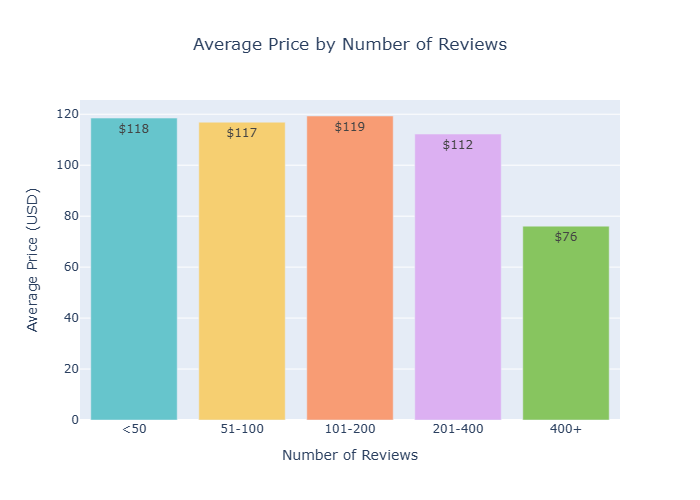

In [29]:
avg_price = df_filtered_copy.groupby('reviews_bin')['price'].mean().reset_index()

fig = px.bar(
    avg_price,
    x='reviews_bin',
    y='price',
    color='reviews_bin',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Average Price by Number of Reviews',
    labels={'reviews_bin': 'Number of Reviews', 'price': 'Average Price (USD)'},
    text_auto='$.0f'
)

fig.update_layout(title_x=0.5, showlegend=False)
fig.show()
fig.show(renderer="png")

### 8. Map of NYC with Airbnb listings colored by price

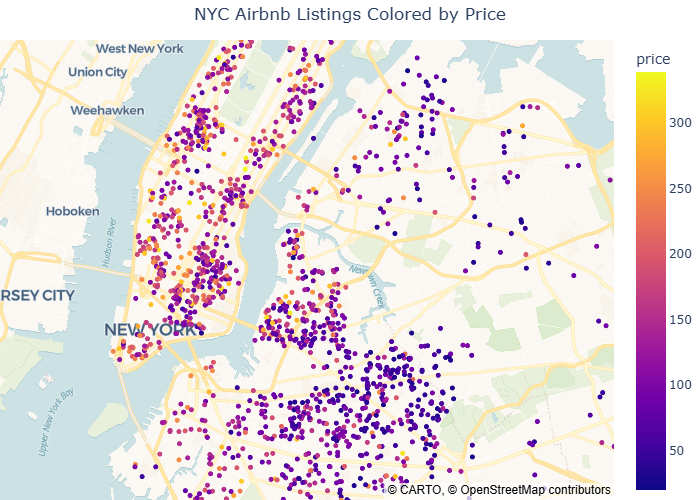

In [30]:
df_sample = df_filtered.sample(n=2000)

fig = px.scatter_map(
    df_sample,
    lat='latitude',
    lon='longitude',
    color='price',
    hover_data=['price','room_type'],
    zoom=11,
    height=550,
    width=900,
    title='NYC Airbnb Listings Colored by Price',
    color_continuous_scale='Plasma'
)

fig.update_layout(
    mapbox_style='carto-positron',
    title_x=0.5,
    margin={"r": 0, "t": 40, "l": 0, "b": 0}
)

fig.show()
fig.show(renderer="png")